In [17]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
data = pd.read_csv("train.csv")

Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=784)

In [4]:
feature_names = data.columns.tolist()

In [5]:
data.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
X = data.iloc[:,1:].values
X.shape

(42000, 784)

In [7]:
y = data.iloc[:,0].values
y.shape

(42000,)

In [8]:
from sklearn.model_selection import train_test_split
X_train ,X_test ,y_train, y_test = train_test_split(X,y,test_size = 0.2 , random_state = 42)

In [9]:
from sklearn.tree import DecisionTreeClassifier , plot_tree
classifier = DecisionTreeClassifier()

In [10]:
classifier.fit(X_train , y_train)
classifier.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [11]:
y_pred = classifier.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred , y_test)
score

0.8539285714285715

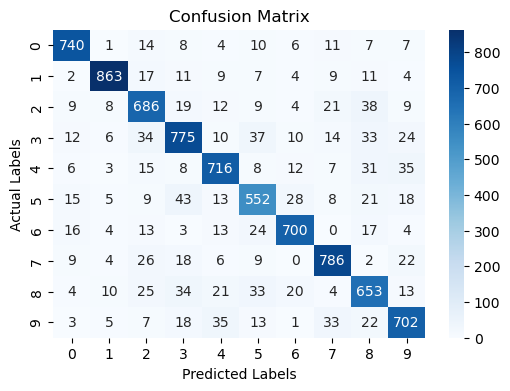

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_pred , y_test)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

In [14]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50]
}


grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=10)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_model = grid_search.best_estimator_
y_pred2 = best_model.predict(X_test)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 30}


In [15]:
new_accuracy = accuracy_score(y_test , y_pred2)
new_accuracy

0.8651190476190476

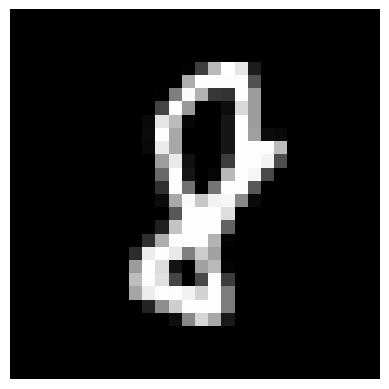

In [34]:
image_data = X_test[0]
image_matrix = np.array(image_data).reshape(28, 28)

# Plot the image
plt.imshow(image_matrix, cmap='gray')
plt.axis('off')  
plt.show()

In [35]:
new_image_data = X_test[0]  
predicted_class = best_model.predict([new_image_data])[0]
predicted_class

8